In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ../..

/media/samuele/Disco/PycharmProjectsUbuntu/MARL-CER


In [2]:
import os
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '.6'
import numpy as np
import jax
import jax.numpy as jnp
import flax.nnx as nnx

import matplotlib as mpl
import matplotlib.pyplot as plt

import pickle
import lzma

from test_vari.multi_env.build_eval_data import build_eval_data

In [3]:
directory = '/media/samuele/Disco/PycharmProjectsUbuntu/MARL-CER/trained_agents_to_keep/server_17-18/20250618_071850'

In [4]:
if os.path.isfile(os.path.join(directory, 'val_data_after_training.xz')):
    with lzma.open(directory + '/val_data_after_training.xz', 'rb') as file:
        val_info = pickle.load(file)
else:
    val_info = build_eval_data(directory)

ActorCritic ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus') ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus')
norm batt
norm? False
['temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus']
['demands_base_battery_houses', 'demands_battery_battery_houses', 'generations_battery_houses', 'mean_demands_base', 'mean_demands_batteries', 'mean_generations', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus']
ActorCritic ('temperature', 'soc', 'demand', 'generation', 'buying_pric

Running for 43,800 iterations:   0%|          | 0/43800 [00:00<?, ?it/s]

ActorCritic ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus') ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus')
norm batt
act (12,)
cri (12,)


Running for 43,800 iterations:   0%|          | 0/43800 [00:00<?, ?it/s]

ActorCritic ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus') ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus')
norm batt
act (12,)
cri (12,)


Running for 43,800 iterations:   0%|          | 0/43800 [00:00<?, ?it/s]

ActorCritic ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus') ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus')
norm batt
act (12,)
cri (12,)


Running for 43,800 iterations:   0%|          | 0/43800 [00:00<?, ?it/s]

ActorCritic ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus') ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus')
norm batt
act (12,)
cri (12,)


Running for 43,800 iterations:   0%|          | 0/43800 [00:00<?, ?it/s]

ActorCritic ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus') ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus')
norm batt
act (12,)
cri (12,)


Running for 43,800 iterations:   0%|          | 0/43800 [00:00<?, ?it/s]

ActorCritic ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus') ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus')
norm batt
act (12,)
cri (12,)


Running for 43,800 iterations:   0%|          | 0/43800 [00:00<?, ?it/s]

ActorCritic ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus') ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus')
norm batt
act (12,)
cri (12,)


Running for 43,800 iterations:   0%|          | 0/43800 [00:00<?, ?it/s]

ActorCritic ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus') ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus')
norm batt
act (12,)
cri (12,)


Running for 43,800 iterations:   0%|          | 0/43800 [00:00<?, ?it/s]

ActorCritic ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus') ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus')
norm batt
act (12,)
cri (12,)


Running for 43,800 iterations:   0%|          | 0/43800 [00:00<?, ?it/s]

ActorCritic ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus') ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus')
norm batt
act (12,)
cri (12,)


Running for 43,800 iterations:   0%|          | 0/43800 [00:00<?, ?it/s]

ActorCritic ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus') ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus')
norm batt
act (12,)
cri (12,)


Running for 43,800 iterations:   0%|          | 0/43800 [00:00<?, ?it/s]

ActorCritic ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus') ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus')
norm batt
act (12,)
cri (12,)


Running for 43,800 iterations:   0%|          | 0/43800 [00:00<?, ?it/s]

ActorCritic ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus') ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus')
norm batt
act (12,)
cri (12,)


Running for 43,800 iterations:   0%|          | 0/43800 [00:00<?, ?it/s]

ActorCritic ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus') ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus')
norm batt
act (12,)
cri (12,)


Running for 43,800 iterations:   0%|          | 0/43800 [00:00<?, ?it/s]

ActorCritic ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus') ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus')
norm batt
act (12,)
cri (12,)


Running for 43,800 iterations:   0%|          | 0/43800 [00:00<?, ?it/s]

ActorCritic ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus') ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus')
norm batt
act (12,)
cri (12,)


Running for 43,800 iterations:   0%|          | 0/43800 [00:00<?, ?it/s]

ActorCritic ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus') ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus')
norm batt
act (12,)
cri (12,)


Running for 43,800 iterations:   0%|          | 0/43800 [00:00<?, ?it/s]

ActorCritic ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus') ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus')
norm batt
act (12,)
cri (12,)


Running for 43,800 iterations:   0%|          | 0/43800 [00:00<?, ?it/s]

ActorCritic ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus') ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus')
norm batt
act (12,)
cri (12,)


Running for 43,800 iterations:   0%|          | 0/43800 [00:00<?, ?it/s]

ActorCritic ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus') ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus')
norm batt
act (12,)
cri (12,)


Running for 43,800 iterations:   0%|          | 0/43800 [00:00<?, ?it/s]

ActorCritic ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus') ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus')
norm batt
act (12,)
cri (12,)


Running for 43,800 iterations:   0%|          | 0/43800 [00:00<?, ?it/s]

In [5]:
with lzma.open(directory + '/config.xz', 'rb') as file:
    config = pickle.load(file)

In [6]:
jax.tree.map(lambda x: x.shape, val_info)

{'actions_batteries': (22, 43800, 3),
 'actions_rec': (22, 43800, 3),
 'balance_minus': (22, 43800),
 'balance_plus': (22, 43800),
 'buy_prices': (22, 43800, 3),
 'demands': (22, 43800, 3),
 'dones': {'REC_agent': (22, 43800),
  '__all__': (22, 43800),
  'battery_agent_0': (22, 43800),
  'battery_agent_1': (22, 43800),
  'battery_agent_2': (22, 43800)},
 'energy_to_batteries': (22, 43800, 3),
 'generations': (22, 43800, 3),
 'norm_reward': {'r_clipping': (22, 43800, 3),
  'r_deg': (22, 43800, 3),
  'r_glob': (22, 43800, 3),
  'r_op': (22, 43800, 3),
  'r_trad': (22, 43800, 3)},
 'pure_reward': {'r_clipping': (22, 43800, 3),
  'r_deg': (22, 43800, 3),
  'r_glob': (22, 43800, 3),
  'r_op': (22, 43800, 3),
  'r_trad': (22, 43800, 3)},
 'r_tot': (22, 43800, 3),
 'rec_reward': (22, 43800),
 'self_consumption': (22, 43800),
 'sell_prices': (22, 43800, 3),
 'soc': (22, 43800, 3),
 'soh': (22, 43800, 3),
 'tot_incentives': (22, 43800),
 'weig_reward': {'r_clipping': (22, 43800, 3),
  'r_deg': 

In [7]:
lim = config['NUM_RL_AGENTS'] if 'NUM_RL_AGENTS' in config.keys() else config['NUM_BATTERY_AGENTS']
a = val_info['r_tot'][..., :lim].sum(axis=(1, 2))
a

array([-4166.328 , -3239.365 , -2872.0112, -2756.196 , -2710.5713,
       -2678.5554, -2660.421 , -2651.2773, -2663.645 , -2652.4023,
       -2668.484 , -2695.95  , -2740.4739, -2741.5686, -2777.262 ,
       -2795.954 , -2850.553 , -2853.3267, -2866.0566, -2877.5916,
       -2892.04  , -2904.9395], dtype=float32)

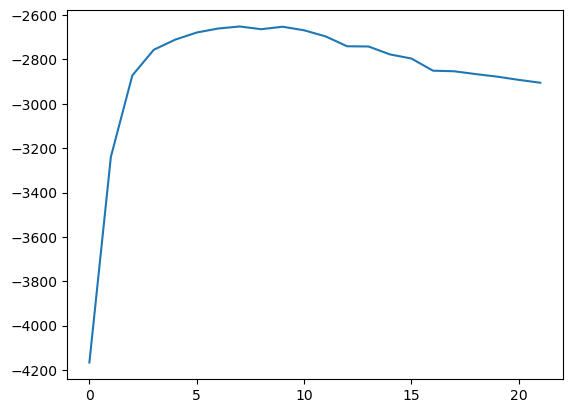

In [8]:
lim = config['NUM_RL_AGENTS'] if 'NUM_RL_AGENTS' in config.keys() else config['NUM_BATTERY_AGENTS']
plt.plot(val_info['r_tot'][..., :lim].sum(axis=(1, 2)))
plt.show()

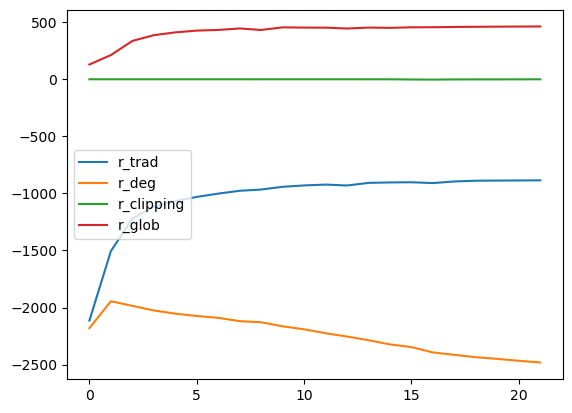

In [9]:
plt.plot(val_info['weig_reward']['r_trad'][..., :lim].sum(axis=(1, 2)), label='r_trad')
plt.plot(val_info['weig_reward']['r_deg'][..., :lim].sum(axis=(1, 2)), label='r_deg')
plt.plot(val_info['weig_reward']['r_clipping'][..., :lim].sum(axis=(1, 2)), label='r_clipping')
plt.plot(val_info['weig_reward']['r_glob'][..., :lim].sum(axis=(1, 2)), label='r_glob')
plt.legend()

In [10]:
cmap = mpl.colormaps['plasma']
n_agents = config['NUM_BATTERY_AGENTS']
colors = cmap(np.linspace(0, 1, n_agents))

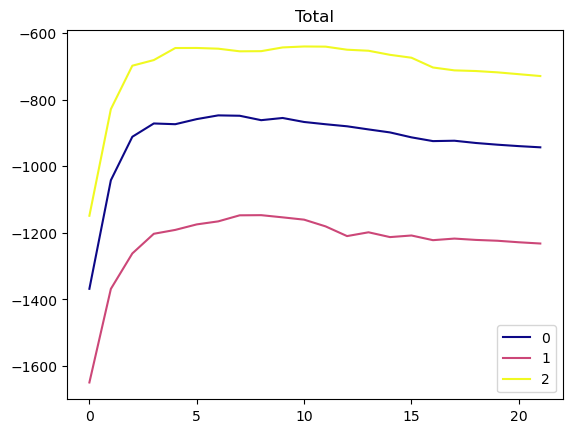

In [11]:
for i in range(n_agents):
    plt.plot(val_info['r_tot'].sum(axis=1)[:, i], color=colors[i], label=f'{i}')
    plt.title('Total')
    plt.legend()
plt.show()

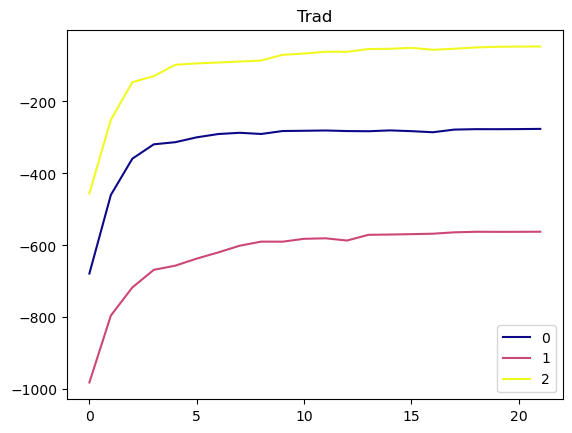

In [12]:
for i in range(n_agents):
    plt.plot(val_info['weig_reward']['r_trad'].sum(axis=1)[:, i], color=colors[i], label=f'{i}')
    plt.title('Trad')
    plt.legend()
plt.show()

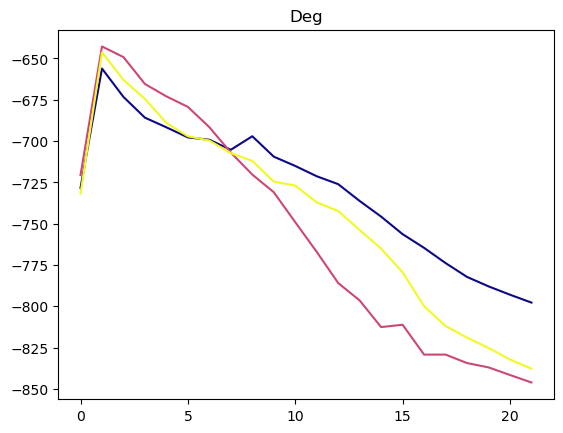

In [13]:
for i in range(n_agents):
    plt.plot(val_info['weig_reward']['r_deg'].sum(axis=1)[:, i], color=colors[i])
    plt.title('Deg')
plt.show()

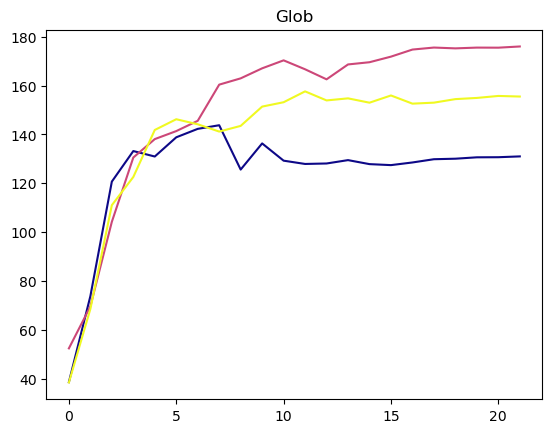

In [14]:
for i in range(n_agents):
    plt.plot(val_info['weig_reward']['r_glob'].sum(axis=1)[:, i], color=colors[i])
    plt.title('Glob')
plt.show()

In [15]:
val_info['self_consumption'].sum(axis=1)

array([1.0663021e+06, 1.7473860e+06, 2.7762000e+06, 3.1930700e+06,
       3.3940292e+06, 3.5271080e+06, 3.5697042e+06, 3.6739480e+06,
       3.5579332e+06, 3.7478698e+06, 3.7284042e+06, 3.7235935e+06,
       3.6608198e+06, 3.7292285e+06, 3.7083868e+06, 3.7466370e+06,
       3.7468442e+06, 3.7694985e+06, 3.7806212e+06, 3.7923870e+06,
       3.7989495e+06, 3.8035882e+06], dtype=float32)

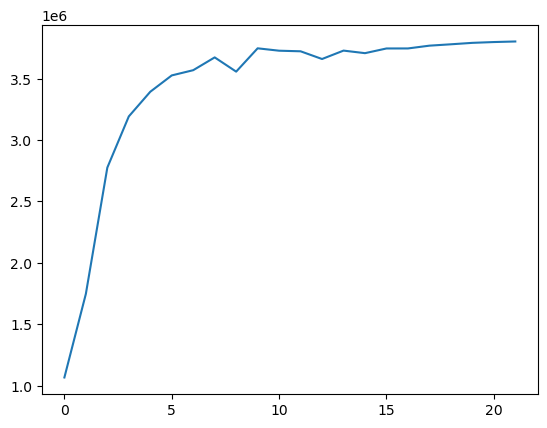

In [16]:
plt.plot(val_info['self_consumption'].sum(axis=1))
plt.show()

In [17]:
soc = val_info['soc']
soc = jax.tree.map(lambda x: x.reshape(x.shape[:1] + (-1, 24) + x.shape[2:]), soc)

In [18]:
soc.shape

(22, 1825, 24, 3)

In [19]:
soc0 = soc[..., 0][7]
soc0.shape

(1825, 24)

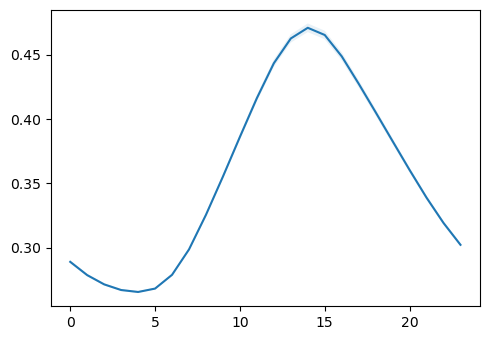

In [20]:
means = soc0.mean(axis=0)
stds = np.std(soc0, axis=0)
ci = 1.96 * stds/np.sqrt(soc0.shape[0])

fig, ax = plt.subplots(1, 1, figsize=(5, 3.5), tight_layout=True)

ax.plot(means)
ax.fill_between(range(len(means)), means + ci, means - ci, alpha=.1)

plt.show()